In [12]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from yolov5.yolov5 import YoloV5

YOLOv5 🚀 c1828ff torch 1.10.2+cu102 CPU



modelo yolo cargado


Fusing layers... 
Model Summary: 369 layers, 20887482 parameters, 0 gradients, 48.1 GFLOPs


In [3]:
from yolov5.utils.image_loader import ImageLoader
import cv2

img = cv2.imread("/home/zaid/github/traffic-tracker/blob.png")
im, im0 = ImageLoader.PreprocessImage(img)

In [4]:
preds = YoloV5.get_bounding_boxes(im = im, im0s = im0)

In [5]:
bounding_boxes_list = []

for prediction in preds:
    x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
    bounding_boxes_list.append([x_start, y_start, x_end, y_end])
    print(preds[prediction])

{'class': 0, 'bounding_box': {'x_start': 366, 'y_start': 971, 'x_end': 609, 'y_end': 1040}, 'confidence': 0.2592807412147522}
{'class': 2, 'bounding_box': {'x_start': 876, 'y_start': 434, 'x_end': 955, 'y_end': 482}, 'confidence': 0.3241974413394928}
{'class': 0, 'bounding_box': {'x_start': 872, 'y_start': 436, 'x_end': 961, 'y_end': 482}, 'confidence': 0.4416048526763916}
{'class': 0, 'bounding_box': {'x_start': 1120, 'y_start': 428, 'x_end': 1194, 'y_end': 462}, 'confidence': 0.4528098404407501}
{'class': 2, 'bounding_box': {'x_start': 904, 'y_start': 446, 'x_end': 1049, 'y_end': 508}, 'confidence': 0.5020219683647156}
{'class': 0, 'bounding_box': {'x_start': 459, 'y_start': 446, 'x_end': 576, 'y_end': 497}, 'confidence': 0.5771611332893372}
{'class': 0, 'bounding_box': {'x_start': 1107, 'y_start': 470, 'x_end': 1221, 'y_end': 547}, 'confidence': 0.5833899974822998}
{'class': 2, 'bounding_box': {'x_start': 547, 'y_start': 442, 'x_end': 664, 'y_end': 491}, 'confidence': 0.640137195587

In [6]:
for prediction in preds:
    if preds[prediction]["confidence"] > 0.5:
        x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
        if preds[prediction]["class"] == 0:
            color = (0,255,0)
        elif preds[prediction]["class"] == 1:
            color = (255,0,0)
        elif preds[prediction]["class"] == 2:
            color = (0,0,255)
        elif preds[prediction]["class"] == 3:
            color = (0,255,255)
        elif preds[prediction]["class"] == 4:
            color = (255,255,0)
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end), color, 4, -1)

In [7]:
print(img.shape)

(1040, 1920, 3)


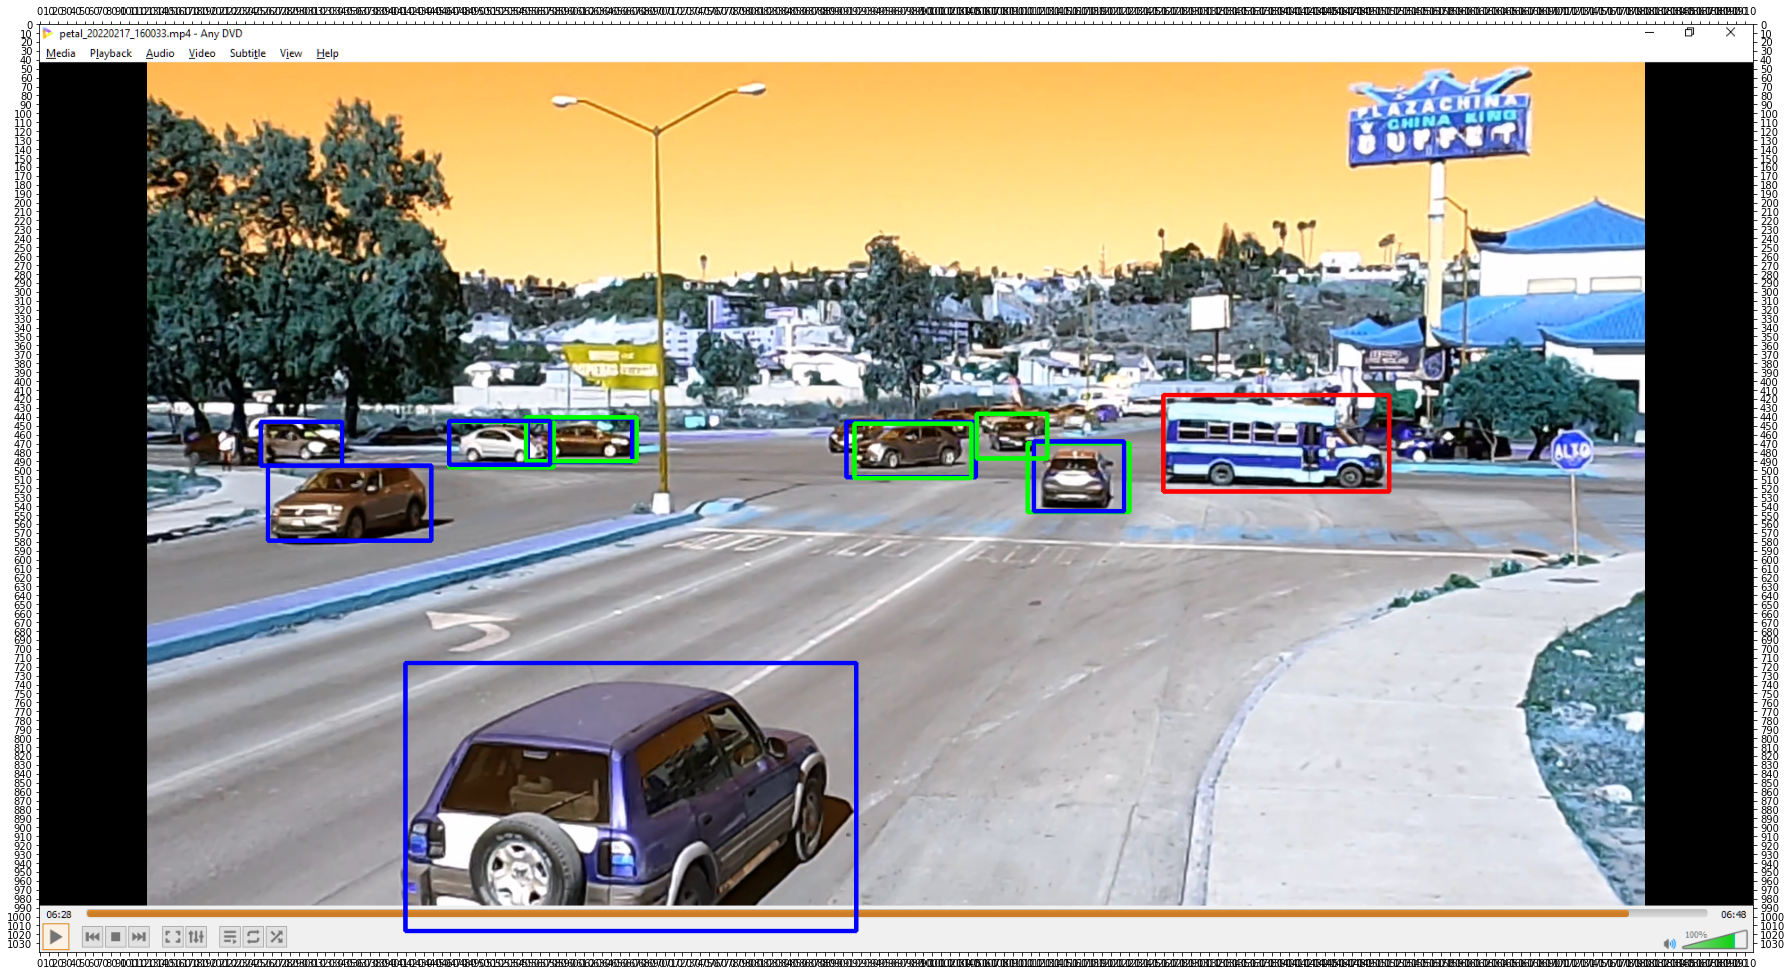

In [13]:
from helpers.plot import plot_image_huge

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_image_huge(img)

In [11]:
print(preds[prediction]["class"])

2


In [9]:
import numpy as np

rects = np.zeros([5])
print(rects.shape)
# check to see if we should run a more computationally expensive
# object detection method to aid our tracker

for prediction in preds:
    if preds[prediction]["confidence"] > 0.5:
        x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
        array = np.array([x_start, y_start, x_end, y_end, preds[prediction]["confidence"]])
        print(array.shape)
        rects = np.vstack((rects, [x_start, y_start, x_end, y_end, preds[prediction]["confidence"]]))
np.delete(rects, 0, 0)

(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)


array([[        904,         446,        1049,         508,     0.50202],
       [        459,         446,         576,         497,     0.57716],
       [       1107,         470,        1221,         547,     0.58339],
       [        547,         442,         664,         491,     0.64014],
       [        545,         441,         669,         490,     0.64103],
       [        248,         446,         339,         495,      0.6413],
       [        459,         445,         572,         494,     0.65906],
       [        913,         448,        1044,         509,      0.7447],
       [       1114,         468,        1215,         546,      0.7588],
       [       1050,         437,        1129,         487,     0.80837],
       [        410,         716,         915,        1016,     0.82208],
       [       1259,         416,        1512,         524,     0.87597],
       [        256,         495,         439,         579,     0.93148]])

In [10]:
print(rects)

[[          0           0           0           0           0]
 [        904         446        1049         508     0.50202]
 [        459         446         576         497     0.57716]
 [       1107         470        1221         547     0.58339]
 [        547         442         664         491     0.64014]
 [        545         441         669         490     0.64103]
 [        248         446         339         495      0.6413]
 [        459         445         572         494     0.65906]
 [        913         448        1044         509      0.7447]
 [       1114         468        1215         546      0.7588]
 [       1050         437        1129         487     0.80837]
 [        410         716         915        1016     0.82208]
 [       1259         416        1512         524     0.87597]
 [        256         495         439         579     0.93148]]
